<a href="https://colab.research.google.com/github/SubashiniB181203/Time-Series-Analysis-Lab/blob/main/221501145_TSA_exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***5. Develop a linear regression model for forecasting time series data.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
file_path = "/content/sample_data/time_series_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Convert date column to datetime and numerical values
df['DATE'] = pd.to_datetime(df['DATE'])
df['timestamp'] = (df['DATE'] - df['DATE'].min()).dt.days  # Days since start

In [4]:
# Prepare data
X = df['timestamp'].values.reshape(-1, 1)
y = df['IPG2211A2N'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Predict
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Forecast future values with an extended range
future_X = np.arange(X.max() + 1, X.max() + 31).reshape(-1, 1)  # Extended future prediction
future_y_pred = model.predict(future_X)

Mean Squared Error: 190.49011938468317


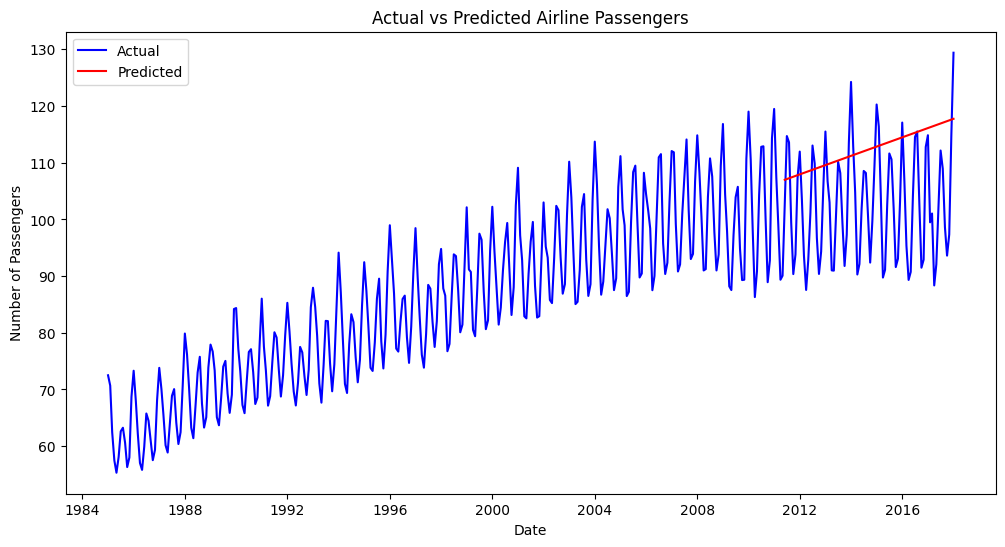

In [7]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], y, label='Actual', color='blue')
plt.plot(df['DATE'].iloc[-len(y_pred):], y_pred, color='red', label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Actual vs Predicted Airline Passengers')
plt.show()